Two Bidimensional Classes as Four Gaussians.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  5.2256283167940545
Average MCC:  0.472149023161
Average macro-F1: 0.732238667364288
Average Accuracy:  82.2135
Standard Deviation:  14.7234997453
Variance:  216.78144475


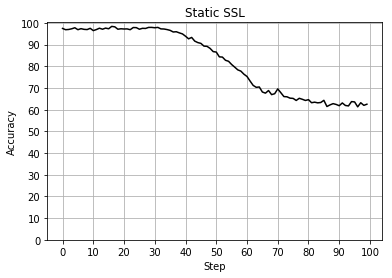

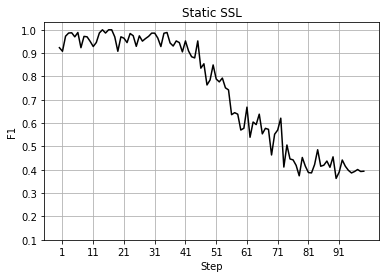




METHOD: Sliding lp as classifier
Execution time:  5.390851623725381
Average MCC:  0.881062999464
Average macro-F1: 0.9391158103130968
Average Accuracy:  95.5726
Standard Deviation:  1.98939921584
Variance:  3.95770924


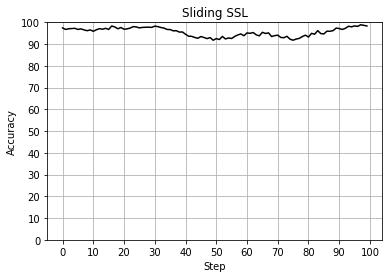

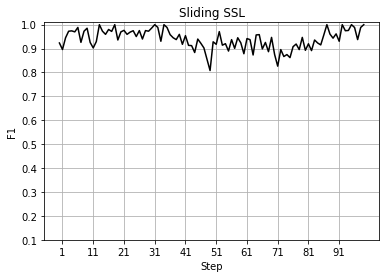




METHOD: Incremental lp as classifier
Execution time:  197.0929537891798
Average MCC:  0.466061837107
Average macro-F1: 0.7298994079855009
Average Accuracy:  81.7176
Standard Deviation:  15.2285089303
Variance:  231.90748424


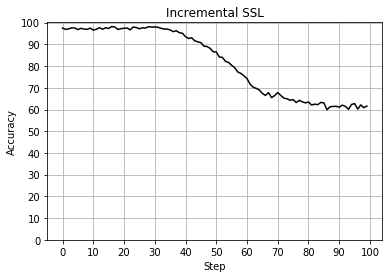

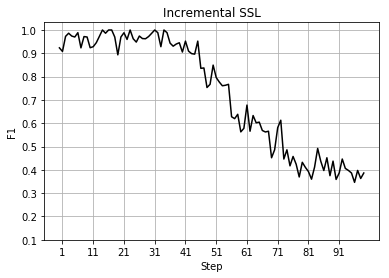




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  31.34169166422717
Average MCC:  0.868856970154
Average macro-F1: 0.9319441993992433
Average Accuracy:  94.8864
Standard Deviation:  2.54411262329
Variance:  6.47250904


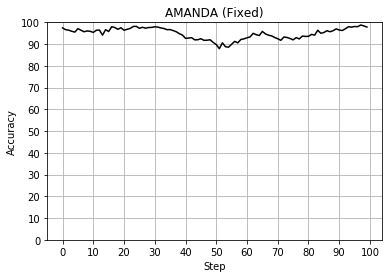

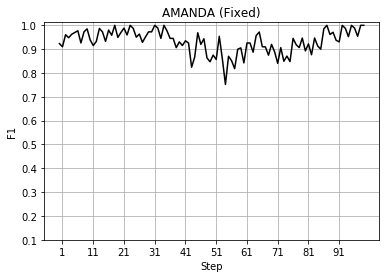




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  33.582668937484186
Average MCC:  0.699129394801
Average macro-F1: 0.8190832219657499
Average Accuracy:  83.6187
Standard Deviation:  11.2567362637
Variance:  126.71411131


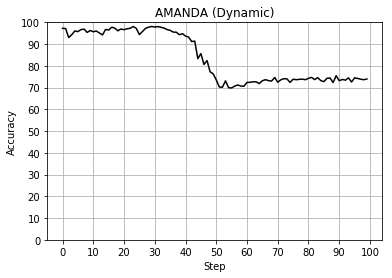

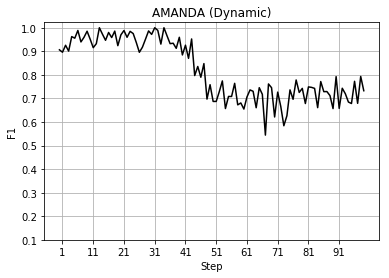




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  60.06080560293009
Average MCC:  0.757968488336
Average macro-F1: 0.8596737396990772
Average Accuracy:  87.8583
Standard Deviation:  8.5515874614
Variance:  73.12964811


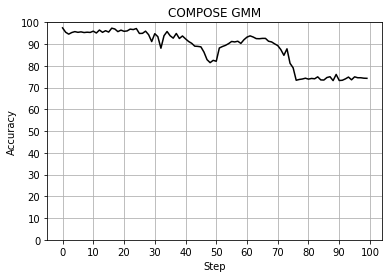

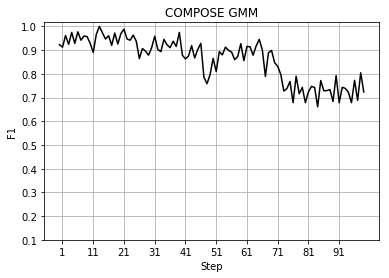




Method: Level IW
Execution time:  60.06080560293009
Average MCC:  -0.0168885297732
Average macro-F1: 0.4892813599772287
Average Accuracy:  95.698946
Standard Deviation:  1.95374726167
Variance:  3.81712836248


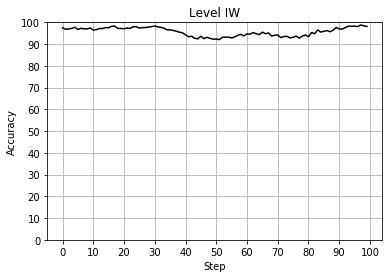

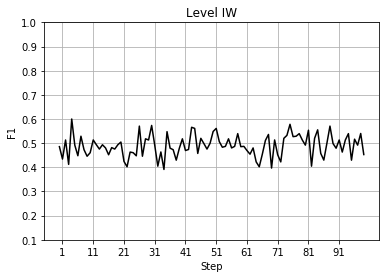

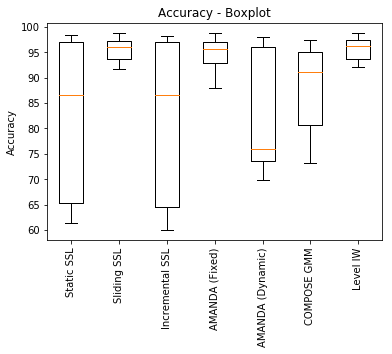

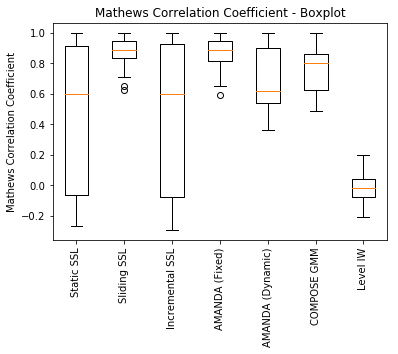

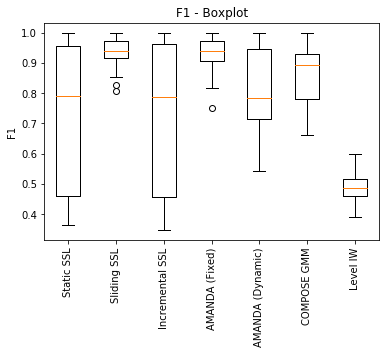

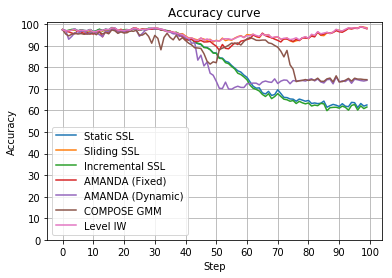

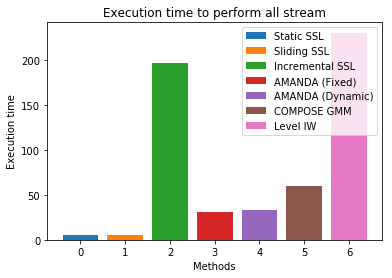

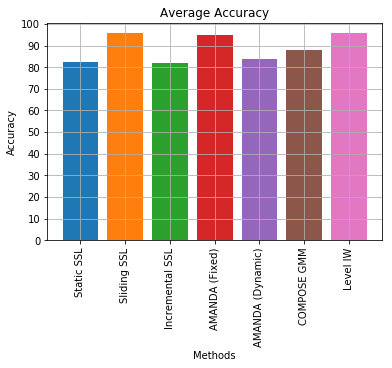

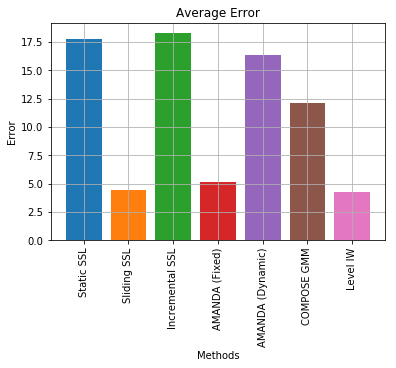

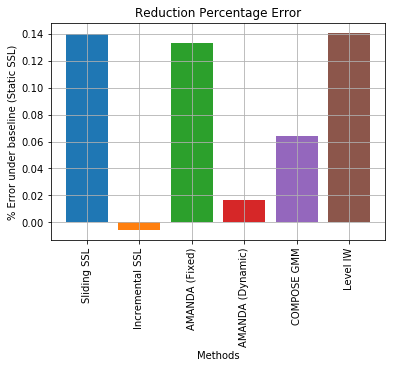

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadFG_2C_2D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.5, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 4, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'FG_2C_2D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()